<a href="https://colab.research.google.com/github/nats1207/ai_masterclass_rubicon/blob/ai_masterclass/Stan_Huiswerk_week_2%263b_Model_training_ministerie_van_onderwijs_cultuur_wetenschap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Model training 101**
##Onderzoek naar acedemische prestatie van studenten vanuit de overheid
----------------------------
Zo, je hebt je features uitgekozen en hypthese staat klaar. Je gaat nu een model kiezen en trainen. Online artikel die je daarbij kan helpen: https://www.kdnuggets.com/choosing-the-right-machine-learning-algorithm-a-decision-tree-approach en je kunt natuurlijk altijd aan een foundation model vragen. Wat belangrijk is dat je een model kiest die ook kan gaan met jouw soort data: hoe groot is je dataset, wat voor datatype is je voorspellende variabele wat, wat voor input variabele heb je. Wanneer je een model kiest moet je snappen hoe de je de metrixes moet lezen: wat betekenen ze? voor Random forest bijvoorbeeld:
- Accuracy
  * Het percentage van alle voorspellingen (zowel positief als negatief) die correct zijn.
  * Focus: Hoe goed het model overall presteert.
- Precision
  * Het percentage van de voorspellingen die positief zijn (bijvoorbeeld "ziek") en daadwerkelijk correct zijn.
  * Focus: meet Type 1 errors (False Positives). Het kijkt naar hoe vaak het model onterecht iets als positief voorspelt (hogere precision is minder vaak onterecht iets positief voorspellen).
  * Belangrijk bijvoorbeeld wanneer: Je wilt voorkomen dat mannen zwanger worden verklaard.
- Recall
  * Wat is het? Het percentage van de werkelijke positieve gevallen (bijvoorbeeld "ziek") dat correct wordt voorspeld.
  * Focus: meet Type 2 errors (False Negatives). Het kijkt naar hoe vaak het model echte positieve gevallen mist. Hogere Recall is minder positieve gevallen missen
  Belangrijk vijvoorbeeld wanneer: Je wilt voorkomen dat zwangere vrouwen niet worden gedetecteerd.
- F1-score
  * Een balans tussen precision en recall. Het is nuttig als je zowel Type 1 als Type 2 errors wilt minimaliseren.
  * Focus: Combineert de nauwkeurigheid van positieve voorspellingen (precision) en het vermogen om echte positieve gevallen te vinden (recall).
  * Belangrijk als: Je een gebalanceerde evaluatie wilt van je model.


Beantwoord nu de volgende vragen:
1. Welke tweede model gebruik je?

2. waarom?

3. welke metrixes horen daar bij?

4. Wat zijn acceptabel haalbare scores voor dat model?

[geef hier antwoord op vraag 1]
- Voor het tweede model wil ik een classifier gebruiken om de studenten in te delen in hoog, middel en laag risico. Hiervoor gebruik ik een RandomForest Classifier.

[geef hier antwoord op vraag 2]
- Ik wil data classificeren in categorieën --> het gaat om een multiclass classificatie --> de classes zijn mutually exclusive --> ik wil graag weten welke kansen het model toekent aan elke mogelijke classe bij zijn voorspelling.
- Een classificatie zou in theorie anders kunnen preseteren dan een voorspelling van een continue waarde.Dus een goede vergelijking met regressie.
- Misschien dat de business juist een classificatie wil en geen voorspelling van de exam_score, zoals met regressie.

[geef hier antwoord op vraag 3]
- Accuracy: percentage juist voorspelde klassen (simpel en duidelijk)
- Confusion matrix: hoeveel voorspellingen goed of fout zijn gegaan per klasse
- Precision: welk percentage van de voorspellingen van een klasse waren juist
- Recall: welk percentage van de echte gevallen herkende het model
- F1-score: balans tussen precisie en recall.

[geef hier antwoord op vraag 4]
- Omdat we classificeren en een focus hebben op de risico studenten, is het vooral belangrijk dat we de klasse 'laag' goed voorspellen.
- Accuracy voor model >= 80%
- Accuracy voor klasse laag >= 80%
- Precision / recall / F1-score: >= 80% (vooral voor klasse 'laag')

## Opdracht 1a. multipele regressie

1. laad je data in

2. trap een multipele regressie model af, welke variabelen heb je gekozen. Hoe goed presteert het model? (MSE etc) zoek online op hoe je model prestaties moet lezen

3. werkte jouw gekozen features voor het regressie model?

4. Heb je jouw hypothese bewezen?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import os
import joblib

In [ ]:
## laad je data in
df_regressie = pd.read_pickle('project_university/regressie_dataset.pkl')

# data voorbereiden
x = df_regressie.drop('exam_score', axis=1)
y = df_regressie['exam_score']

# maak binned labels voor stratificatie van continue variable exam_score
y_binned = pd.qcut(y, q=10, duplicates='drop')  # kwantielverdeling

# split de data voor training en testen
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y_binned) # stratify to maintain exam_score distribution

In [ ]:
## trap hier een multipele regressie model af
regressie_model = LinearRegression()
regressie_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# predicties
y_pred = regressie_model.predict(x_test)

In [ ]:
# evaluatie
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}, dus een gemmiddelde fout van: {math.sqrt(mse):.2f} punten")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 27.02, dus een gemmiddelde fout van: 5.20 punten
R² Score: 0.91


In [ ]:
coefficients = pd.Series(regressie_model.coef_, index=x.columns)
print(coefficients.sort_values())

social_media_hours      -18.816608
netflix_hours           -11.373190
attendance_percentage     6.455091
exercise_frequency        8.488774
sleep_hours              13.442034
mental_health_rating     17.627175
study_hours_per_day      78.743746
dtype: float64


[geef hier antwoord op vraag 2]
- Gekozen variabelen: "study_hours_per_day", "social_media_hours", "netflix_hours", "attendance_percentage", "sleep_hours", "exercise_frequency", "mental_health_rating"
- MSE vab 27.02, dus een gemiddelde fout van 5.2 punt op een schaal van 0-100. Prima score wat mij betreft, maar daar gaat de business over uiteindelijk.
- R2 (variantie in targetvariabele (y) wat verklaard wordt door het model) van 0.91. Maximaal haalbare is 1 en alles boven de 0.9 geeft eigenlijk al aan dat je model de werkelijke uitkomsten goed verklaart.

[geef hier antwoord op vraag 3]
- Met bovenstaande scores kan ik wel concluderen dat de gekozen features werken, maar dat is ook aan de business.
- Wel zijn de verschillen tussen de coefficienten vrij groot. De grootste en de kleinste coefficient zijn:
  - study_hours_per_day      78.743746
  - attendance_percentage     6.455091
- Het is dus het overwegen waard om sommige features uit het model te laten of samen te voegen.

[geef hier antwoord op vraag 4]
- H2: studenten die meer investeren in hun studie, hebben een signifacant lagere kans op studievertraging of -uitval.
  - study_hours_per_day: 78.74 (groot positief effect op exam_score)
  - attendance_percentage: 6.46 (klein positief effect op exam_score)
  - social_media_hours: -18.82 (groot negatief effect op exam_score)
  - netflix_hours: -11.37 (middel negatief effect op exam_score)
- --> Op basis van de richting van de coefficienten en grote van in ieder geval studie uren, social media uren en netflix uren, kunnen we concluderen dat deze hypothese klopt. Studenten die meer investeren in hun studie door middel van het aantal uren wat ze studeren per dag en weinig op social media en netflix zitten, hebben minder kans op uitval.

- H3: studenten die zorg dragen voor hun gezondheid, hebben een significantl lagere kans op studievertraging of -uitval.
  - sleep_hours: 13.44 (middel positief effect op exam_score)
  - exercise_frequency: 8.49 (klein positief effect op exam_score)
  - mental_heatlh_rating: 17.63 (middel positief effect op exam_score)
- --> Op basis van de richting van de coefficienten en grote van in ieder geval sleep_hours en mental_health_rating, kunnen we concluderen dat deze hypothese klopt. Studenten die meer zorg dragen voor hun gezondheid, hebben minder kans op uitval.


In [ ]:
#sla je regressie model hier op

# Map aanmaken
os.makedirs('project_university', exist_ok=True)  # exist_ok=True voorkomt fouten als de map al bestaat
print("Map 'project_university' aangemaakt!")

# Model opslaan
joblib.dump(regressie_model, 'project_university/regressie_model.pkl')
print("Model opgeslagen als 'regressie_model.pkl'")

Map 'project_university' aangemaakt!
Model opgeslagen als 'regressie_model.pkl'


#opdracht 1b. [insert model here]
1. laad je data in

2. trap je eigen gekozen model af, welke variabelen heb je gekozen. Hoe goed presteert het model? (MSE etc) zoek online op hoe je model prestaties moet lezen

3. werkte jouw gekozen features voor het regressie model?

4. Heb je jouw hypothese bewezen?

In [ ]:
## laad je data in
df_classifier = pd.read_pickle('project_university/classifier_dataset.pkl')

# data voorbereiden
x = df_classifier.drop('exam_score_klasse', axis=1)
y = df_classifier['exam_score_klasse']

# split de data voor training en testen
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y) # stratify to maintain exam_score distribution

In [ ]:
## trap hier je eigen gekozen model af

# Initialize and train the Random Forest Classifier
c_model = RandomForestClassifier(n_estimators=10000, random_state=42, max_features= 10) # Use class_weight='balanced' for imbalanced data
c_model.fit(x_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=10000, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = c_model.predict(x_test)

                 Feature  Importance
0    study_hours_per_day    0.456752
6   mental_health_rating    0.151023
1     social_media_hours    0.091912
4            sleep_hours    0.089158
2          netflix_hours    0.084310
3  attendance_percentage    0.081217
5     exercise_frequency    0.045629


/tmp/ipython-input-11-2335900570.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


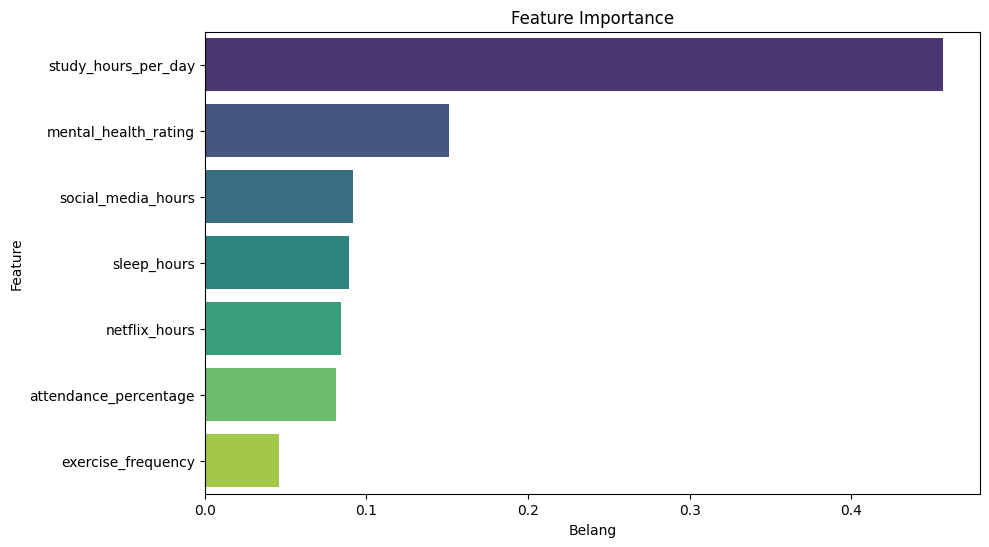

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

        hoog       0.87      0.88      0.87        91
        laag       0.67      0.50      0.57         8
      middel       0.82      0.83      0.82        82

    accuracy                           0.84       181
   macro avg       0.79      0.74      0.76       181
weighted avg       0.84      0.84      0.84       181


Confusion Matrix:
[[80  0 11]
 [ 0  4  4]
 [12  2 68]]


In [ ]:
# Feature importance ophalen
feature_importances = c_model.feature_importances_

# Maak een DataFrame voor overzicht
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print de feature importance
print(importance_df)

# Visualiseer de feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Belang')
plt.ylabel('Feature')
plt.show()
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


[geef hier antwoord op vraag 2]
- Gekozen variabelen: "study_hours_per_day", "social_media_hours", "netflix_hours", "attendance_percentage", "sleep_hours", "exercise_frequency", "mental_health_rating"
- Accuracy van 0.84. Geen slechte score, maar is uiteindelijk aan de business.
- De precisie, recall en f1-score zijn wel wat laag voor de belangrijkste klasse ('laag'). Daar zou ik zeker nog aandacht aan besteden

[geef hier antwoord op vraag 3]
- Met bovenstaande scores kan ik wel concluderen dat de gekozen features werken.
- Wel zijn de verschillen tussen het belang van elke feature vrij groot (net zoals bij de regressie). De grootste en de kleinste coefficient zijn:
  - study_hours_per_day   0.46
  - exercise_frequency    0.05
- Het is dus het overwegen waard om sommige features uit het model te laten of samen te voegen.

[geef hier antwoord op vraag 4]
- H2: studenten die meer investeren in hun studie, hebben een signifacant lagere kans op studievertraging of -uitval.
  - --> De features die hier aan bijdragen hebben invloed. Dus ik zou zeggen dat de hypothese klopt. Maar dit kan vast beter getest worden.

- H3: studenten die zorg dragen voor hun gezondheid, hebben een significantl lagere kans op studievertraging of -uitval.
  - --> De features die hier aan bijdragen hebben invloed. Dus ik zou zeggen dat de hypothese klopt. Maar dit kan vast beter getest worden.


In [ ]:
## sla je eigen gekozen model hier op

# Map aanmaken
os.makedirs('project_university', exist_ok=True)  # exist_ok=True voorkomt fouten als de map al bestaat
print("Map 'project_university' aangemaakt!")

# Model opslaan
joblib.dump(c_model, 'project_university/c_model.pkl')
print("Model opgeslagen als 'c_model.pkl'")

Map 'project_university' aangemaakt!
Model opgeslagen als 'c_model.pkl'


#opdracht 2. evaluatie process?
Als onderzoeker heb je dus samen met de business bedacht hoe goed het model moet presteren.

1. heb je uiteindelijk studenten die hulp nodig gaan hebben kunnen voorspellen? Ja, wees dan kritisch waar rekening mee gehouden moet worden. Nee? hoe komt het volgens jou dat de voorspelling niet naar business waarde is gelukt?

2. je gaat nu een feedback loop in als data scientist. Je weet dat het wel of niet heeft gewerkt. Wat is er nu voor nodig om het beter of wel te laten werken? Zou je andere features kunnen toevoegen of had je outliers moeten verwijderen?

3. Geef nu antwoord op de gestelde hypothesis, is het wel of neit gelukt om de veronderstelling te bewijzen?

4. denk na over nieuwe hypothesis en probeer tot een hogere score te komen (score die beter in lijn is met wat de business verwacht van het model)


**[dubbel klik om antwoord te geven op de vragen.]**

1. Met beide modellen moet het mogelijk zijn om studenten die hulp nodig hebben te voorspellen. In dit geval zou ik dan wel kiezen voor het regressie model. Daarbij komt wel dat een mens moet inschatten welke exam_score aanleiding geeft tot ingrijpen. Het classificatie model presteert zwak op de belangrijkse klasse ('laag'), dus als je dit model wilt gebruiken moeten er verbeterslagen gemaakt worden.

2. Ik richt mij even op het classificatie model, omdat ik denk dat dat het regressiemodel voldoende presteert. Om een betere inschatting te maken van de risicovolle studenten vraag ik mij af of de bestaande dataset voldoende is. Er correleerde al weinig variabelen met de exam_score. Dus ik zou eerder, in overleg met de business, opzoek gaan naar additionele data. Denk aan:
  - Data over meerdere meetmomenten heen
  - Eerdere evaluaties van mentoren/docenten/etc.
  - Etc.

3. Zie antwoorden in vorige delen van de opdracht. Voor beide hypotheses (H2 en H3) is dnek ik voldoende bewijs gevonden dat ze kloppen.

4. Als test heb ik alleen studie uren en mental health in het model laten staan. Dit vergroot de precisie, recall en f1-score van de belangrijkse klasse ('laag') aanzienlijk (0.67 --> 0.83      0.50 --> 0.62      0.57 --> 0.71). De accuracy van het model daalt van 0.84 naar 0.78. Dat is opzich te voerzien als de business meer waarde hecht aan het juist voorspellen van de belangrijkste klasse.

                Feature  Importance
0   study_hours_per_day    0.718241
1  mental_health_rating    0.281759


/tmp/ipython-input-18-62728438.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_new, palette='viridis')


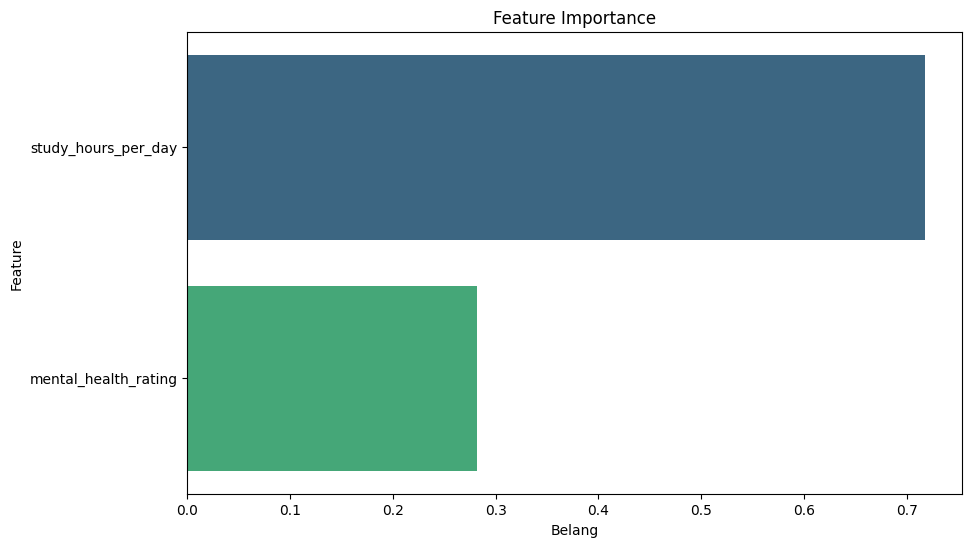

Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

        hoog       0.79      0.82      0.81        91
        laag       0.83      0.62      0.71         8
      middel       0.76      0.74      0.75        82

    accuracy                           0.78       181
   macro avg       0.80      0.73      0.76       181
weighted avg       0.78      0.78      0.78       181


Confusion Matrix:
[[75  0 16]
 [ 0  5  3]
 [20  1 61]]


In [ ]:
## train je model opnieuw

df_classifier_new = pd.read_pickle('project_university/classifier_dataset.pkl')

# data voorbereiden
x_new = df_classifier_new.drop(['exam_score_klasse', 'exercise_frequency', 'attendance_percentage', 'netflix_hours', 'sleep_hours', 'social_media_hours'], axis=1)
y_new = df_classifier_new['exam_score_klasse']

# split de data voor training en testen
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2, random_state=42, stratify=y_new) # stratify to maintain exam_score distribution

# Initialize and train the Random Forest Classifier
c_model_new = RandomForestClassifier(n_estimators=10000, random_state=42, max_features= 10) # Use class_weight='balanced' for imbalanced data
c_model_new.fit(x_train_new, y_train_new)

# Make predictions on the test set
y_pred_new = c_model_new.predict(x_test_new)

# Feature importance ophalen
feature_importances_new = c_model_new.feature_importances_

# Maak een DataFrame voor overzicht
importance_df_new = pd.DataFrame({
    'Feature': x_new.columns,
    'Importance': feature_importances_new
}).sort_values(by='Importance', ascending=False)

# Print de feature importance
print(importance_df_new)

# Visualiseer de feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_new, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Belang')
plt.ylabel('Feature')
plt.show()
# Evaluate the model
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy: {accuracy_new:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_new, y_pred_new))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_new, y_pred_new))